### IOT Analytics Home work
#### By Karan Rakesh

Given in the box below is the function to run the simulation. Scroll below for the task 3.

In [242]:
import pandas as pd
import random
import math
import numpy as np
from collections import deque
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [243]:


def runsim(df,ri,nri,rs,nrs,noOfBatches,msgPerBatch):
    rt_int = ri
    nonrt_int = nri
    rts = rs
    nonrts = nrs
    queue_rt = deque()
    queue_nrt = deque()
    rt_arr = []
    nrt_arr = []
    rt_mean = []
    nrt_mean = []
    rt_95per = []
    nrt_95per = []
    rbatchno = 1
    nrbatchno = 1
    rt_msgs = 0
    nrt_msgs = 0
    #Since the initial setting is s = 2, we assume the msg arrived at mc = 0.
    queue_nrt.append(0)
    x = 0
    while rbatchno <= noOfBatches or nrbatchno <= noOfBatches:
        """ 
        print("RT")
        print(queue_rt)
        print("NRT")
        print(queue_nrt) 
        """
        x+=1
        lrow = df.iloc[[-1]]
        lrow = [lrow]
        nrow = df.iloc[[-1]]
        nrow = [nrow]
        #if int(lrow.mc)>=timelimit:
        #    break
        if ((lrow.rtcl) <= (lrow.nonrtcl)) & ((lrow.rtcl) <= (lrow.scl)):
            nrow.mc = lrow.rtcl
            nrow.rtcl += rt_int
            ##qrt
            queue_rt.append(nrow.mc)
            rt_int = (ri * -math.log(np.random.uniform(0,1)))
            if (lrow.s)==0:
                nrow.s=1
                nrow.scl= nrow.mc + rts
                rts = (rs * -math.log(np.random.uniform(0,1)))
            elif (lrow.s)==1 and (nrow.mc) == (lrow.scl):
                nrow.scl= nrow.mc + rts
                ##qrt
                temp = queue_rt.popleft()
                rt_arr.append((nrow.mc - temp))
                rt_msgs += 1
                rts = (rs * -math.log(np.random.uniform(0,1)))
            elif (lrow.s)==1:
                nrow.nrt += 1
            elif (lrow.s)==2:
                nrow.preempt = lrow.scl-lrow.rtcl
                if (nrow.mc) == (lrow.scl):
                    ##qnrt
                    temp = queue_nrt.popleft()
                    nrt_arr.append((nrow.mc - temp))
                    nrt_msgs += 1
                nrow.s = 1
                nrow.scl= nrow.mc + rts
                rts = (rs * -math.log(np.random.uniform(0,1)))
                if (nrow.preempt > 0):
                    nrow.nnonrt += 1
                
        elif (lrow.nonrtcl) <= (lrow.scl):
            nrow.mc = lrow.nonrtcl
            nrow.nonrtcl += nonrt_int
            ##qnrt
            queue_nrt.append(int(nrow.mc))
            nonrt_int = (nri * -math.log(np.random.uniform(0,1)))
            if int(lrow.s)==0:
                nrow.s=2
                nrow.scl= nrow.mc + nonrts
                nonrts = (nrs * -math.log(np.random.uniform(0,1)))
            elif (nrow.mc) == (lrow.scl):
                if int(lrow.s)==1:
                    ##qrt
                    temp = queue_rt.popleft()
                    rt_arr.append((nrow.mc - temp))
                    rt_msgs += 1
                elif int(lrow.s)==2:
                    ##qnrt
                    temp = queue_nrt.popleft()
                    nrt_arr.append((nrow.mc - temp))
                    nrt_msgs += 1
                
                if (lrow.nrt) > 0:
                    nrow.nrt -= 1
                    nrow.s = 1
                    nrow.scl= nrow.mc + rts
                    rts = (rs * -math.log(np.random.uniform(0,1)))
                elif int(lrow.preempt) > 0:
                    nrow.scl = lrow.scl + lrow.preempt
                    nrow.s=2
                    nrow.preempt = 0
                else:
                    nrow.s=2
                    nrow.scl= nrow.mc + nonrts
                    nonrts = (nrs * -math.log(np.random.uniform(0,1)))
            elif (lrow.s)==1:
                nrow.nnonrt += 1
            elif (lrow.s)==2:
                nrow.nnonrt += 1
        else:
            nrow.mc = lrow.scl
            if (lrow.s)==1:
                ##qrt
                temp = queue_rt.popleft()
                rt_arr.append((nrow.mc - temp))
                rt_msgs += 1
            elif (lrow.s)==2:
                ##qnrt
                temp = queue_nrt.popleft()
                nrt_arr.append((nrow.mc - temp))
                nrt_msgs += 1
                
            if (lrow.nrt) > 0:
                nrow.scl = nrow.mc + rts
                rts = (rs * -math.log(np.random.uniform(0,1)))
                nrow.nrt -= 1
                nrow.s = 1
            elif (lrow.preempt) > 0:
                nrow.scl = nrow.mc + lrow.preempt
                nrow.nnonrt -= 1
                nrow.s = 2
                nrow.preempt = 0
            elif (lrow.nnonrt) > 0:
                nrow.scl = nrow.mc + nonrts
                nonrts = (nrs * -math.log(np.random.uniform(0,1)))
                nrow.nnonrt -= 1
                nrow.s = 2
            else:
                nrow.s = 0
                nrow.scl = max((nrow.rtcl),(nrow.nonrtcl))                
        df = nrow
        if rbatchno <= noOfBatches and rt_msgs >= msgPerBatch:
            rt_mean.append(np.mean(rt_arr))
            rt_95per.append(np.percentile(rt_arr,95))
            rt_arr = []
            rt_msgs = 0
            rbatchno += 1
            print("rbatch "+str(rbatchno) + " " + str(x)+ " " +str(rt_int)+ " " +str(nonrt_int)+ " " +str(rts)+ " " +str(nonrts))
        if nrbatchno <= noOfBatches and nrt_msgs >= msgPerBatch:
            nrt_mean.append(np.mean(nrt_arr))
            nrt_95per.append(np.percentile(nrt_arr,95))
            nrt_arr = []
            nrt_msgs = 0
            nrbatchno += 1
            print("nrbatch "+str(nrbatchno) + " " + str(x)+ " " +str(rt_int)+ " " +str(nonrt_int)+ " " +str(rts)+ " " +str(nonrts))
        #display(nrow)
    
    return df,rt_mean,rt_95per,nrt_mean,nrt_95per

def write_file(df,fileno):
    writer = pd.ExcelWriter('task_2_'+fileno+'.xlsx', engine='xlsxwriter')

    df2.to_excel(writer, sheet_name='Sheet1')

    writer.save()

In [244]:
def runsim1(ri,nri,rs,nrs,noOfBatches,msgPerBatch):
    ##Initializations
    queue_rt = deque()
    queue_nrt = deque()
    rt_arr = []
    nrt_arr = []
    rt_mean = []
    nrt_mean = []
    rt_95per = []
    nrt_95per = []
    rbatchno = 1
    nrbatchno = 1
    rt_msgs = 0
    nrt_msgs = 0
    mc = 0
    rtcl= 3
    nonrtcl= 5
    nrt= 0
    nnonrt= 0
    scl= 4
    s= 2
    preempt= 0

    #Since the initial setting is s = 2, we assume the msg arrived at mc = 0.
    queue_nrt.append(0)

    while rbatchno <= noOfBatches or nrbatchno <= noOfBatches:
        
        if scl <= rtcl and scl <=nonrtcl:
            mc = round(scl,2)
            if s==1:
                temp = queue_rt.popleft()
                rt_arr.append(mc - temp)
                if rbatchno <= noOfBatches and len(rt_arr) >= msgPerBatch:
                    rt_mean.append(np.mean(rt_arr))
                    rt_95per.append(np.percentile(rt_arr,95))
                    rt_arr.clear()
                    rbatchno += 1
                    
            elif s==2:
                temp = queue_nrt.popleft()
                nrt_arr.append(mc - temp)
                if nrbatchno <= noOfBatches and len(nrt_arr) >= msgPerBatch:
                    nrt_mean.append(np.mean(nrt_arr))
                    nrt_95per.append(np.percentile(nrt_arr,95))
                    nrt_arr.clear()
                    nrbatchno += 1

            if len(queue_rt) > 0:
                scl = round(mc + (rs * -math.log(np.random.uniform(0,1))),2)
                s = 1
            elif preempt > 0:
                scl = round(mc + preempt,2)
                preempt = 0.0
                s = 2
            elif len(queue_nrt) > 0:
                scl = round(mc + (nrs * -math.log(np.random.uniform(0,1))),2)
                s = 2
            else:
                scl = round(max(rtcl,nonrtcl) + 1.0,2)
                s = 0
        elif rtcl <= nonrtcl:
            mc = round(rtcl,2)
            rtcl = round(mc + (ri * -math.log(np.random.uniform(0,1))),2)
            queue_rt.append(mc)
            if s == 0:
                scl = round(mc + (rs * -math.log(np.random.uniform(0,1))),2)
                s = 1
            if s == 2:
                preempt = round(scl - mc,2)
                scl = round(mc + (rs * -math.log(np.random.uniform(0,1))),2)
                s = 1
        else:
            mc = round(nonrtcl,2)
            nonrtcl = round(mc + (nri * -math.log(np.random.uniform(0,1))),2)
            queue_nrt.append(mc)
            if s == 0:
                scl = round(mc + (nrs * -math.log(np.random.uniform(0,1))),2)
                s = 2
     
    return rt_mean,rt_95per,nrt_mean,nrt_95per


Following from textbook implementation and https://mgimond.github.io/Stats-in-R/CI.html

In [259]:
def graphing(rt_arr,nrt_arr,k):
    
    ### Calculation of CI for RT
    mean_of_rt = np.mean(rt_arr[1:])
    mean_of_nrt = np.mean(nrt_arr[1:])
    std_of_rt = np.std(rt_arr[1:])
    std_of_nrt = np.std(nrt_arr[1:])
    lower_rt_95conf_bound = mean_of_rt - 1.96*std_of_rt#/math.sqrt(len(rt_arr[1:]))
    lower_nrt_95conf_bound = mean_of_nrt - 1.96*std_of_nrt#/math.sqrt(len(rt_arr[1:]))
    upper_rt_95conf_bound = mean_of_rt + 1.96*std_of_rt#/math.sqrt(len(rt_arr[1:]))
    upper_nrt_95conf_bound = mean_of_nrt + 1.96*std_of_nrt#/math.sqrt(len(rt_arr[1:]))

    ### Calculation of CI for nonRT
    mean_of_rt1 = np.mean(rt_95per[1:])
    mean_of_nrt1 = np.mean(nrt_95per[1:])
    std_of_rt1 = np.std(rt_95per[1:])
    std_of_nrt1 = np.std(nrt_95per[1:])
    lower_rt_95conf_bound1 = mean_of_rt1 - 1.96*std_of_rt1#/math.sqrt(len(rt_95per[1:]))
    lower_nrt_95conf_bound1 = mean_of_nrt1 - 1.96*std_of_nrt1#/math.sqrt(len(rt_95per[1:]))
    upper_rt_95conf_bound1 = mean_of_rt1 + 1.96*std_of_rt1#/math.sqrt(len(rt_95per[1:]))
    upper_nrt_95conf_bound1 = mean_of_nrt1 + 1.96*std_of_nrt1#/math.sqrt(len(rt_95per[1:]))

    fig, ax = plt.subplots(figsize=(22,18), ncols=2, nrows=2)
    plt.subplots_adjust(
        wspace  =  0.2, 
        hspace  =  0.3
    )

    plt.suptitle("Graphs for the case non-RT = " + str(k), y = 0.95, fontsize=30)

    sns.distplot(rt_arr[1:], hist = False, ax=ax[0][0])
    sns.distplot(rt_95per[1:], hist = False, ax=ax[0][1])
    sns.distplot(nrt_arr[1:], hist = False, ax=ax[1][0])
    sns.distplot(nrt_95per[1:], hist = False, ax=ax[1][1])
    
    ax[0][0].set_title("Distribution of Sample Means of RT msgs", y=1.015, fontsize=20)
    ax[0][0].axvline(x=mean_of_rt, linestyle='--', linewidth=2.5, label="mean of means", c='orange')
    ax[0][0].axvline(x=lower_rt_95conf_bound, linestyle='--', linewidth=2.5, label="lower bound 95% CI ", c='g')
    ax[0][0].axvline(x=upper_rt_95conf_bound, linestyle='--', linewidth=2.5, label="upper bound 95% CI ", c='purple')
    ax[0][0].set_xlabel("mean of processing time", labelpad=7)
    ax[0][0].set_ylabel("frequency of occurence", labelpad=7)
    ax[0][0].legend(bbox_to_anchor=(1, 1), loc="upper right");
    
    ax[0][1].set_title("Distribution of 95th percentiles of RT msgs", y=1.015, fontsize=20)
    ax[0][1].axvline(x=mean_of_rt1, linestyle='--', linewidth=2.5, label="mean of 95th per", c='orange')
    ax[0][1].axvline(x=lower_rt_95conf_bound1, linestyle='--', linewidth=2.5, label="lower bound 95% CI ", c='g')
    ax[0][1].axvline(x=upper_rt_95conf_bound1, linestyle='--', linewidth=2.5, label="upper bound 95% CI ", c='purple')
    ax[0][1].set_xlabel("95th percentile of processing time", labelpad=7)
    ax[0][1].set_ylabel("frequency of occurence", labelpad=7)
    ax[0][1].legend(bbox_to_anchor=(1, 1), loc="upper right");
 
    ax[1][0].set_title("Distribution of Sample Means of non-RT msgs", y=1.015, fontsize=20)
    ax[1][0].axvline(x=mean_of_nrt, linestyle='--', linewidth=2.5, label="mean of means", c='orange')
    ax[1][0].axvline(x=lower_nrt_95conf_bound, linestyle='--', linewidth=2.5, label="lower bound 95% CI ", c='g')
    ax[1][0].axvline(x=upper_nrt_95conf_bound, linestyle='--', linewidth=2.5, label="upper bound 95% CI ", c='purple')
    ax[1][0].set_xlabel("mean of processing time", labelpad=7)
    ax[1][0].set_ylabel("frequency of occurence", labelpad=7)
    ax[1][0].legend(bbox_to_anchor=(1, 1), loc="upper right");

    ax[1][1].set_title("Distribution of 95th percentiles of NRT msgs", y=1.015, fontsize=20)
    ax[1][1].axvline(x=mean_of_nrt1, linestyle='--', linewidth=2.5, label="mean of 95th per", c='orange')
    ax[1][1].axvline(x=lower_nrt_95conf_bound1, linestyle='--', linewidth=2.5, label="lower bound 95% CI ", c='g')
    ax[1][1].axvline(x=upper_nrt_95conf_bound1, linestyle='--', linewidth=2.5, label="upper bound 95% CI ", c='purple')
    ax[1][1].set_xlabel("95th percentile of processing time", labelpad=7)
    ax[1][1].set_ylabel("frequency of occurence", labelpad=7)
    ax[1][1].legend(bbox_to_anchor=(1, 1), loc="upper right");

    plt.savefig(str(k)+'_plots.png', dpi=45, bbox_inches='tight')
    plt.show()

## Task 3 

The values below represent:
* rt_int is the mean for real time msg interval
* nonrt_int is the mean for non real time msg intercal
* rts is the mean for real time msg service time
* nonrts is the mean for non real time service time
* noOfBatches is the number of batches
* msgPerBatch is the number of messages in a batch

-----------

Set the __explicitInput = True__ if you want to set arbitrary values for simulation. 

Set the __explicitInput = False__ if you want to run the for loop for simulation. 

-------

#### Important:

If explicitInput is True, please set the values in the cell below (Between the ### comments). I have __not used__ the input() since it is  is not user friendly on Jupyter Notebook.

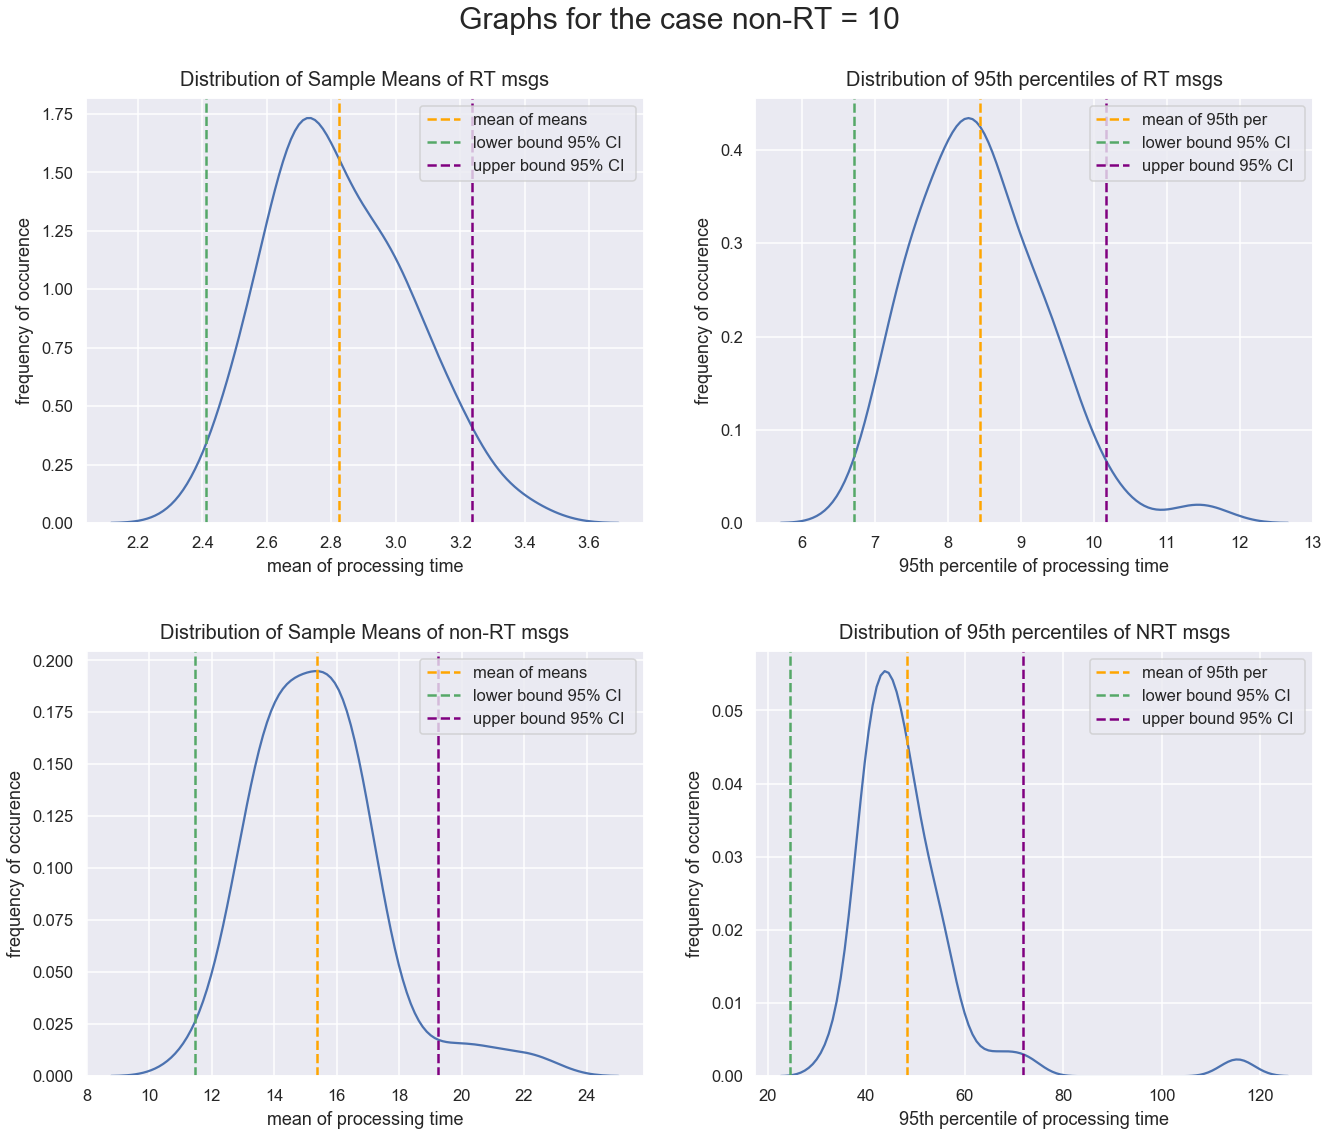

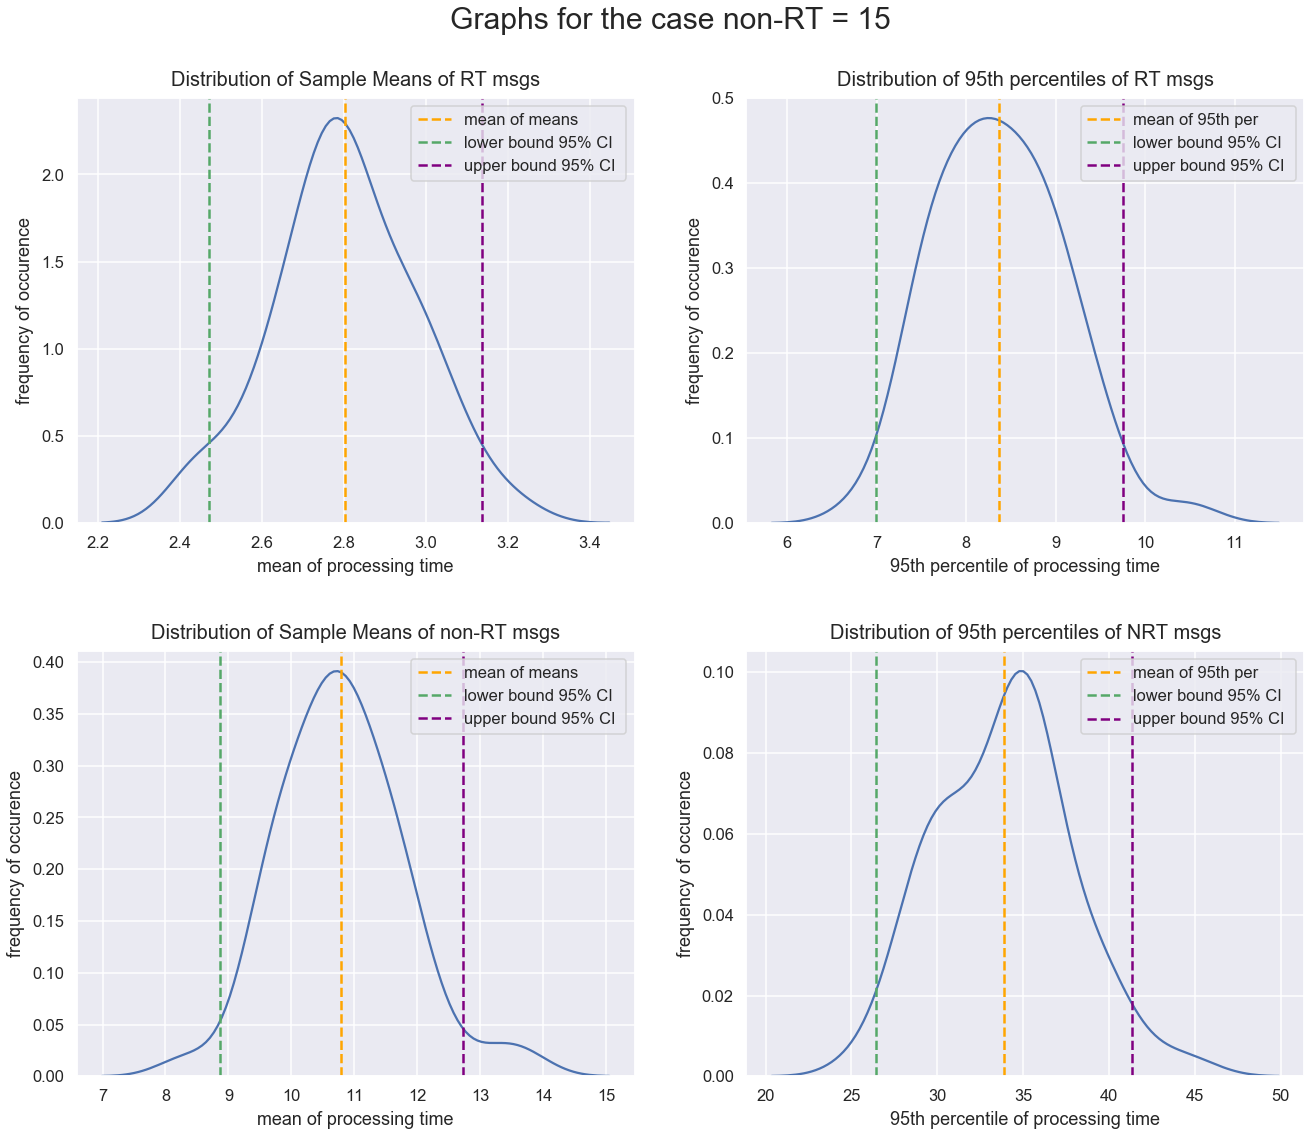

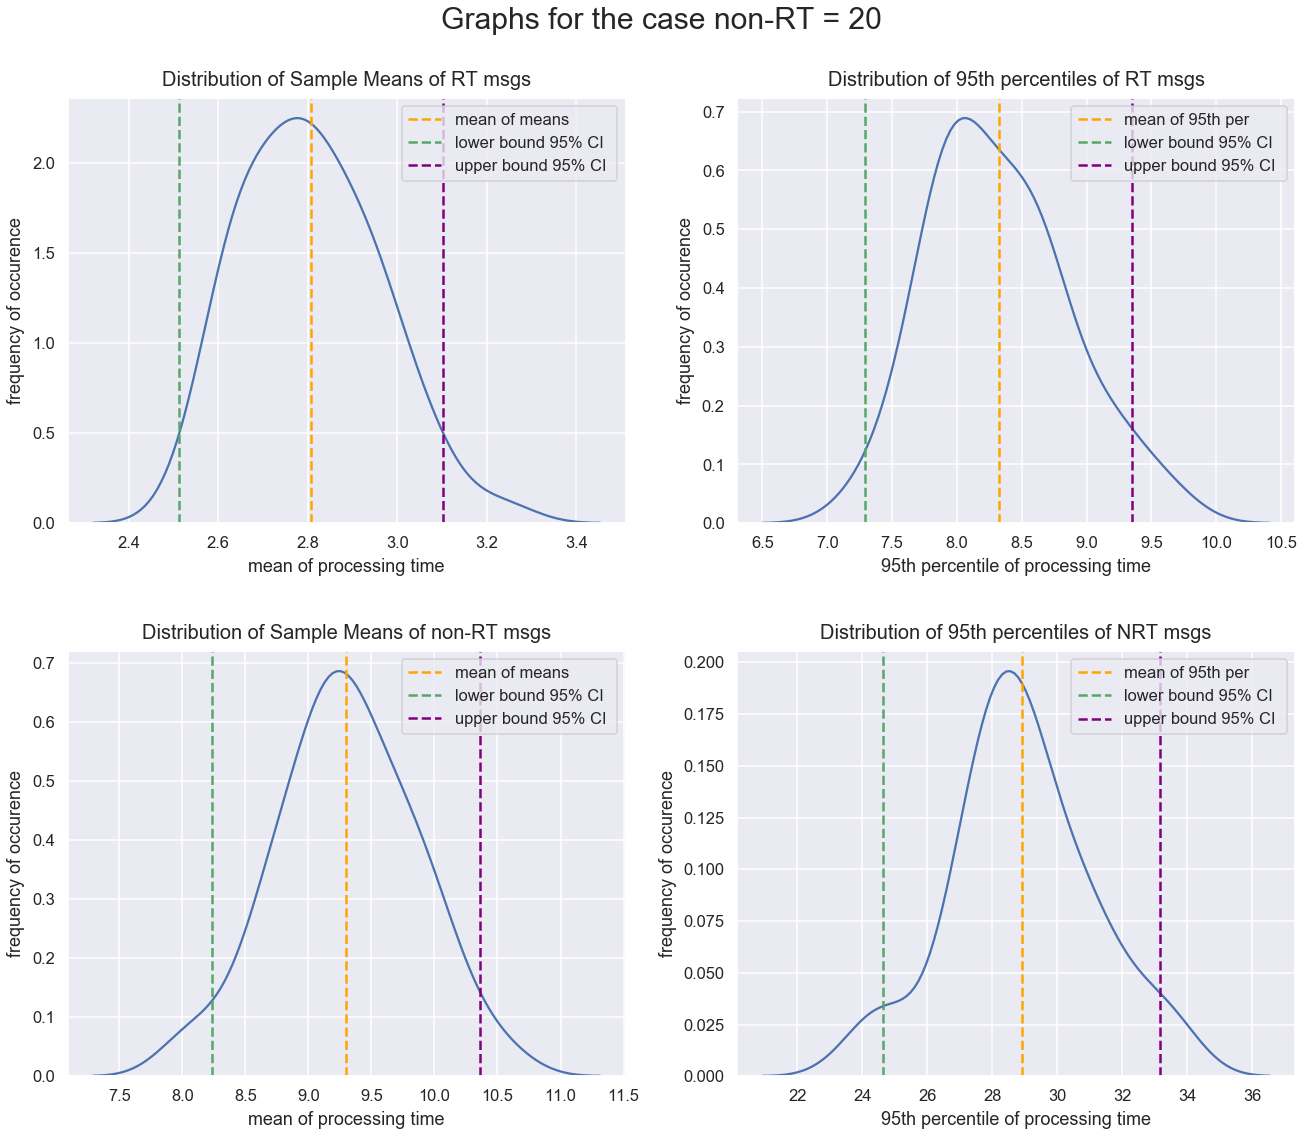

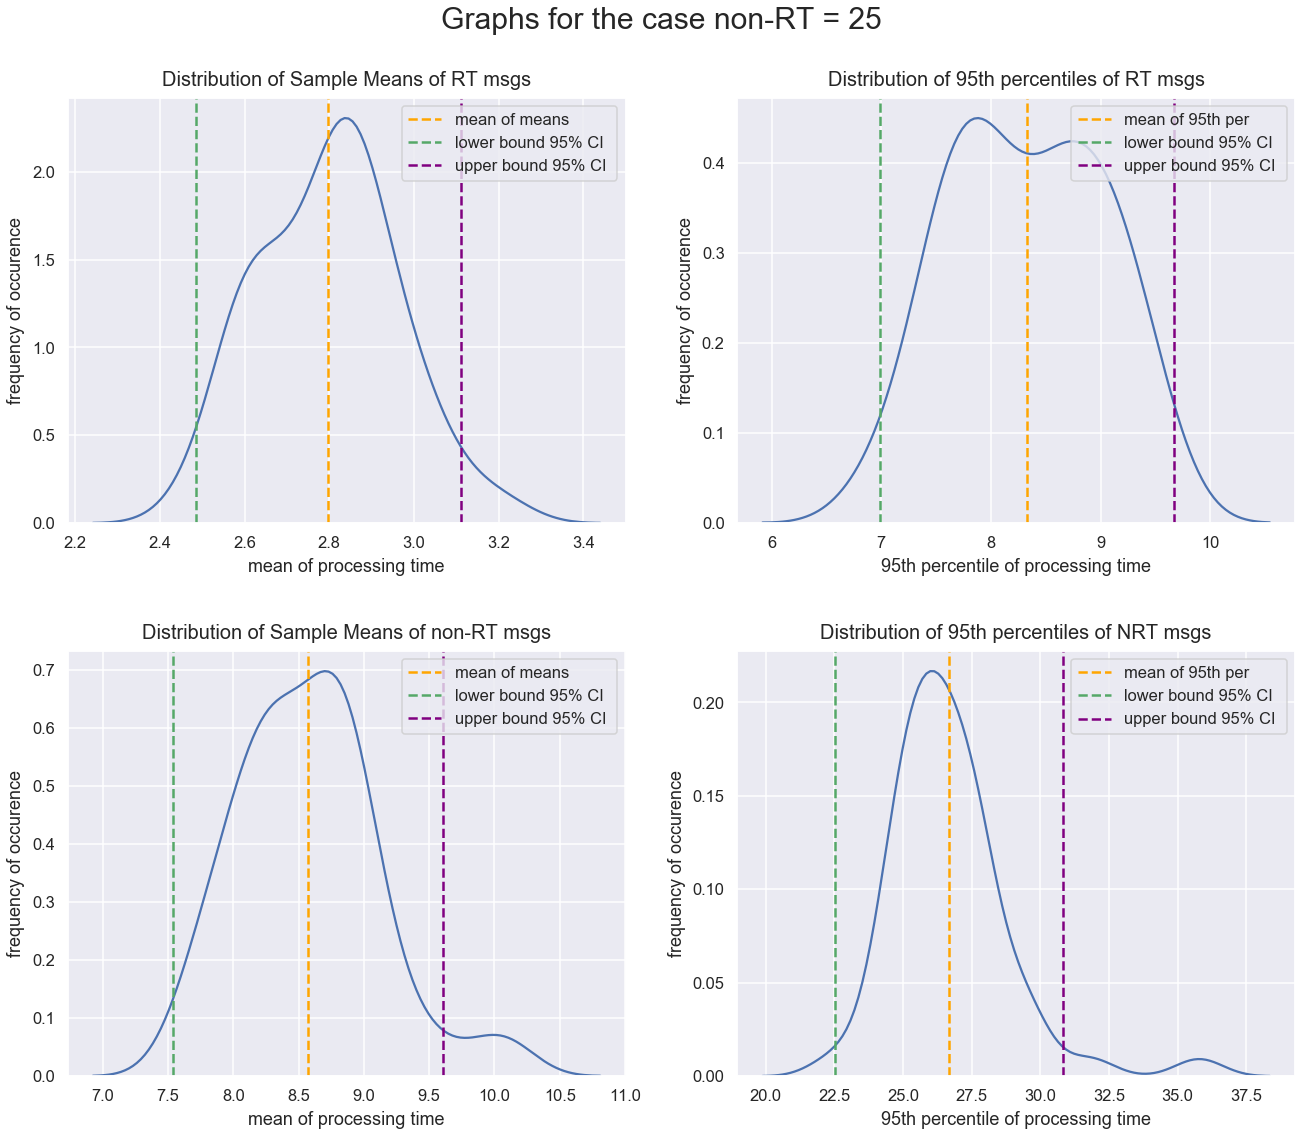

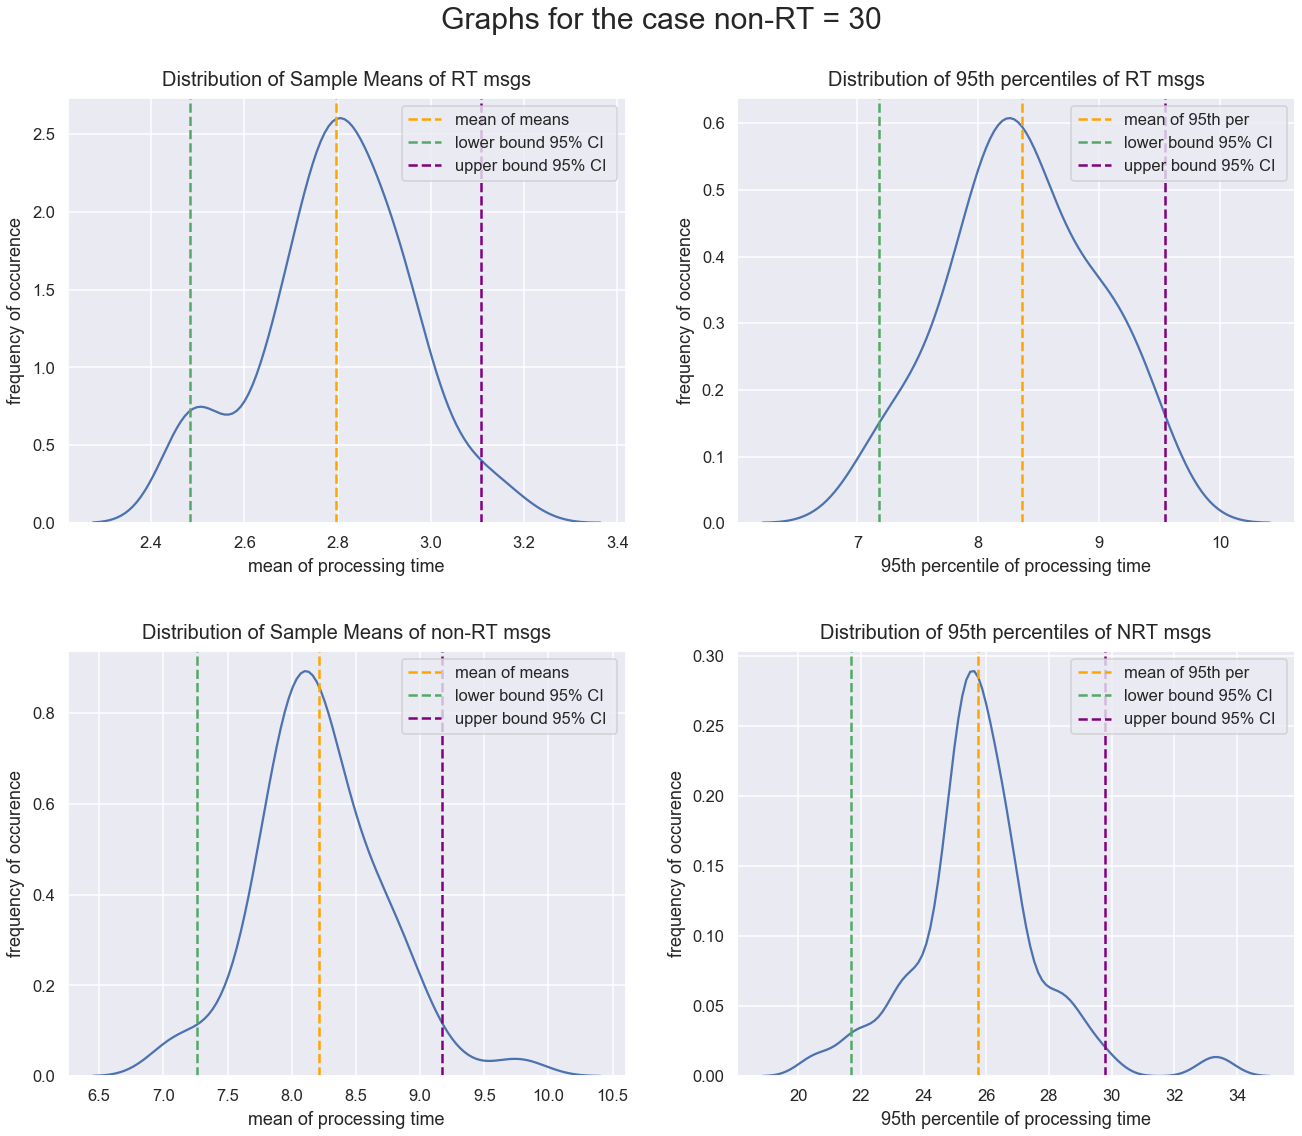

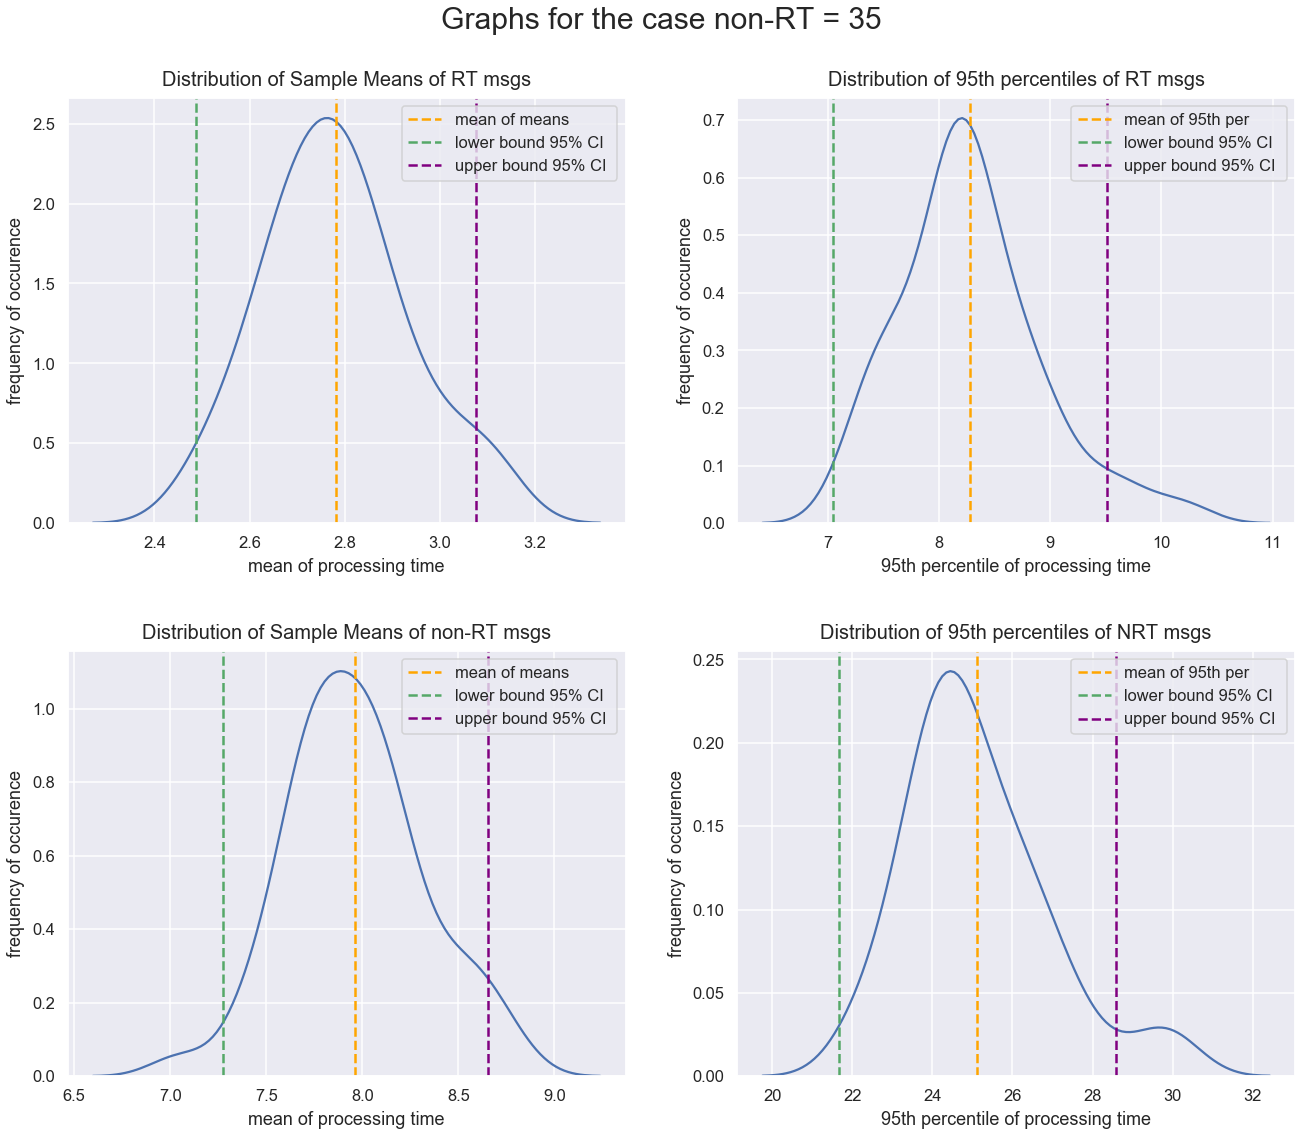

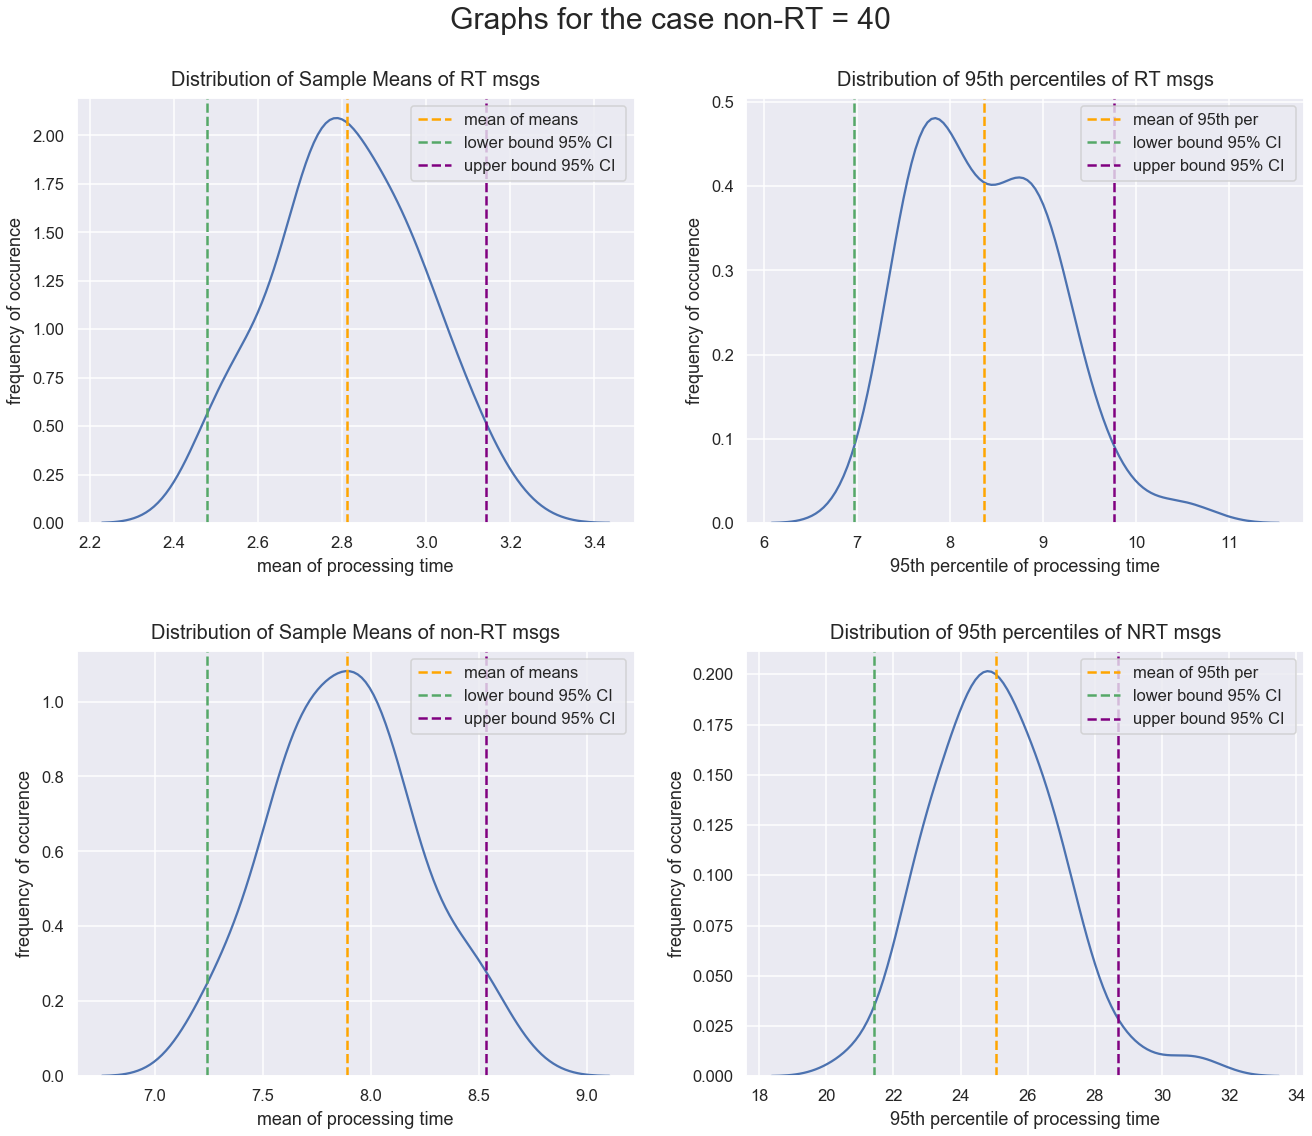

In [258]:
explicitInput = False

i = 0

######  PLEASE SET VALUES HERE IF EXPLICIT INPUT IS TRUE

if explicitInput == True:
    rt_int = 7
    nonrt_int = 10
    rts = 2
    nonrts = 4
    noOfBatches = 51
    msgPerBatch = 1000

###### END OF INPUT PARAMETERS, CAN PROCEED TO RUN CODE NOW
    
    rt_arr = []
    rt_95per = []
    nrt_arr = []
    nrt_95per = []

    rt_arr,rt_95per,nrt_arr,nrt_95per = runsim1(rt_int,nonrt_int,rts,nonrts,noOfBatches,msgPerBatch)
    graphing(rt_arr,nrt_arr,i)

else:
    for i in range(10,41,5): 
        rt_int = 7.0
        nonrt_int = i*1.0
        rts = 2.0
        nonrts = 4.0
        noOfBatches = 51
        msgPerBatch = 1000

        rt_arr = []
        rt_95per = []
        nrt_arr = []
        nrt_95per = []

        rt_arr,rt_95per,nrt_arr,nrt_95per = runsim1(rt_int,nonrt_int,rts,nonrts,noOfBatches,msgPerBatch)
        graphing(rt_arr,nrt_arr,i)

    
        